# Handling missing values.

## Complete case analysis (CCA)

### >Condition 
- Missing should be at random
- after droping the null value distribution of data should not be change
- We can apply only on those columns where percentage of null values is greater than 0 and less than 5%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv('data_science_job.csv')

In [3]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0


In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

## missing value < 5% and > 0%

In [21]:
cols= [ i for i in df.columns if  df[i].isnull().mean()>0 and df[i].isnull().mean()<0.05 ]

In [22]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

## These are targeted columns

In [24]:
df= df[cols]

In [25]:
df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [26]:
df.isnull().mean()*100

city_development_index    2.500261
enrolled_university       2.014824
education_level           2.401086
experience                0.339284
training_hours            3.998330
dtype: float64

## ready for CCA

### Before removing the null valur we have to check the distribution of Data before and after .
#### Distribution should not be change

In [37]:
len(df.dropna())*100/len(df)

89.68577095730244

### 89.685 shows that data remain after the removal of null values.

In [40]:
df.education_level.value_counts()/len(df)

education_level
Graduate          0.605387
Masters           0.227633
High School       0.105282
Phd               0.021610
Primary School    0.016077
Name: count, dtype: float64

In [41]:
new_df = df.dropna()

In [43]:
new_df.isnull().mean()

city_development_index    0.0
enrolled_university       0.0
education_level           0.0
experience                0.0
training_hours            0.0
dtype: float64

In [44]:
new_df.education_level.value_counts()/len(new_df)

education_level
Graduate          0.619835
Masters           0.234082
High School       0.107380
Phd               0.022116
Primary School    0.016587
Name: count, dtype: float64

In [48]:
temp = pd.concat([
    df.education_level.value_counts()/len(df),
    new_df.education_level.value_counts()/len(new_df)
    
    
],axis=1)

temp.columns= ['orginal','after_removal']

In [55]:
temp

,orginal,after_removal
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


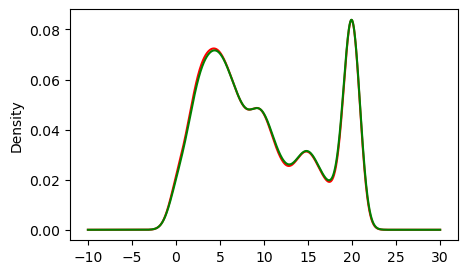

In [60]:
plt.figure(figsize=(5,3))
# original data
df['experience'].plot.density( color='red')

# data after cca
new_df['experience'].plot.density(color='green')
plt.show()

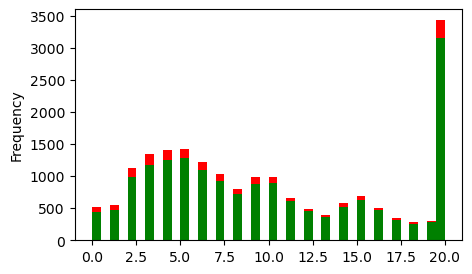

In [63]:
plt.figure(figsize=(5,3))
# original data
df['experience'].plot.hist( bins=40,color='red')

# data after cca
new_df['experience'].plot.hist(bins=40, color='green')
plt.show()

## We can saw that here the ratio of all value in experience columns are almost remain same.

## Done !!